In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


### df_i for input data and df_o for the outputs

In [2]:
df_i = pd.read_csv('./data/data.csv', index_col='time')
df_o = pd.read_csv('./data/outputs.csv', index_col='time')


#### I have visualy identified 3 major price movements during EDA.

- between '2020-09-06' and '2020-10-15' 
    ==> horizontal price movement
- between '2020-10-15' and '2020-11-25'
    ==> Bullish market 
- between '2020-11-25' and '2020-12' (to the end)
    ==> Volatile market. Price has no certain direction

### Checking the number of trades

In [3]:
def position_summary(start='2020-09-06', end='2020-12-12'):

    x = df_o[start: end]
    position_history = {'buy_count': 0, 'sell_count': 0}
    buy = 1
    sell = -1
    for i in x.position:
        if i == buy:
            position_history['buy_count'] += 1
        if i == sell:
            position_history['sell_count'] += 1

    bc = position_history['buy_count']
    sc = position_history['sell_count']
    buy_ratio = bc / (bc + sc)
    sell_ratio = sc / (bc + sc)
    
    print (f'Between {start} and {end} {bc} trades, {buy_ratio:.2f}')
    print (f'Between {start} and {end} {sc} trades, {sell_ratio:.2f}')


In [4]:
position_summary('2020-09-06', '2020-10-15')
position_summary('2020-10-15', '2020-11-25')
position_summary('2020-11-25', '2020-12')

Between 2020-09-06 and 2020-10-15 61 trades, 0.46
Between 2020-09-06 and 2020-10-15 71 trades, 0.54
Between 2020-10-15 and 2020-11-25 64 trades, 0.47
Between 2020-10-15 and 2020-11-25 73 trades, 0.53
Between 2020-11-25 and 2020-12 11 trades, 0.55
Between 2020-11-25 and 2020-12 9 trades, 0.45


### Success of trades

In [5]:
def num_successful_trades(start='2020-09-06', end='2020-12-12'):
    x = df_o[start: end]
    buy = 1
    sell = -1
    position_success = {'buy_succeeded': 0, 'buy_failed': 0, 'sell_succeeded': 0, 'sell_failed': 0}
    bs = position_success['buy_succeeded']
    ss = position_success['sell_succeeded']
    bf = position_success['buy_failed']
    sf = position_success['sell_failed']
    for r, p in enumerate(x.position):
        if p == buy:
            if np.sign(df_o.pnl_ratio[r]) == buy:
                bs += 1
            if np.sign(df_o.pnl_ratio[r]) == sell:
                bf += 1
        if p == sell:
            if np.sign(df_o.pnl_ratio[r]) == sell:
                ss += 1
            if np.sign(df_o.pnl_ratio[r]) == buy:
                sf += 1

    print (f'buy_succeeded: {bs}, buy_failed: {bf}, sell_succeeded: {ss}, sell_failed: {sf}, success/fail ratio:{(bs+ss)/(bs+ss+bf+sf):.2f}')
                




In [6]:
num_successful_trades()
num_successful_trades('2020-09-06', '2020-10-15')
num_successful_trades('2020-11-25', '2020-12')
num_successful_trades('2020-10-15', '2020-11-25')


buy_succeeded: 83, buy_failed: 71, sell_succeeded: 88, sell_failed: 79, success/fail ratio:0.53
buy_succeeded: 35, buy_failed: 26, sell_succeeded: 37, sell_failed: 34, success/fail ratio:0.55
buy_succeeded: 9, buy_failed: 2, sell_succeeded: 3, sell_failed: 6, success/fail ratio:0.60
buy_succeeded: 39, buy_failed: 25, sell_succeeded: 40, sell_failed: 33, success/fail ratio:0.58


### Some other statistics

In [7]:
average_trade_len = sum(df_o.trade_len) / len(df_o.trade_len)
average_trade_len

3.6728395061728394

In [8]:
max(df_o.capital), min(df_o.capital), sum(df_o.step), sum(df_o.trade_len)

(11880.8, 9854.69, 2004.0, 1190.0)

In [9]:
sum(df_o.step), f'{sum(df_o.duration)/3600:.2f} hours', sum(df_o.trade_len)

(2004.0, '4.60 hours', 1190.0)

In [10]:
df = df_i.join(df_o)
df.fillna(method='ffill', inplace=True)
df

,open,high,low,close,volume,index,duration,epsilon,capital,episode,step,position,entry_price,exit_price,trade_len,pnl_ratio
time,,,,,,,,,,,,,,,,
2020-08-30 14:00:00,11603.09,11615.71,11563.11,11598.75,1776.930843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30 15:00:00,11598.75,11665.11,11592.94,11628.01,2709.298855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30 16:00:00,11627.64,11634.54,11600.17,11620.03,2045.906069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30 17:00:00,11620.02,11658.99,11557.69,11616.20,2615.250909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30 18:00:00,11616.21,11685.00,11580.00,11665.70,2767.038960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-12 13:00:00,18506.10,18525.33,18427.01,18445.15,1831.731773,2486.0,40.48,0.0009,11136.77,323.0,5.0,-1.0,18036.53,18282.02,4.0,-1.36
2020-12-12 14:00:00,18445.14,18451.35,18388.88,18400.21,1443.035834,2486.0,40.48,0.0009,11136.77,323.0,5.0,-1.0,18036.53,18282.02,4.0,-1.36
2020-12-12 15:00:00,18400.21,18475.63,18308.82,18372.97,2537.663833,2497.0,83.28,0.0009,11120.28,324.0,10.0,1.0,18400.21,18372.97,1.0,-0.15


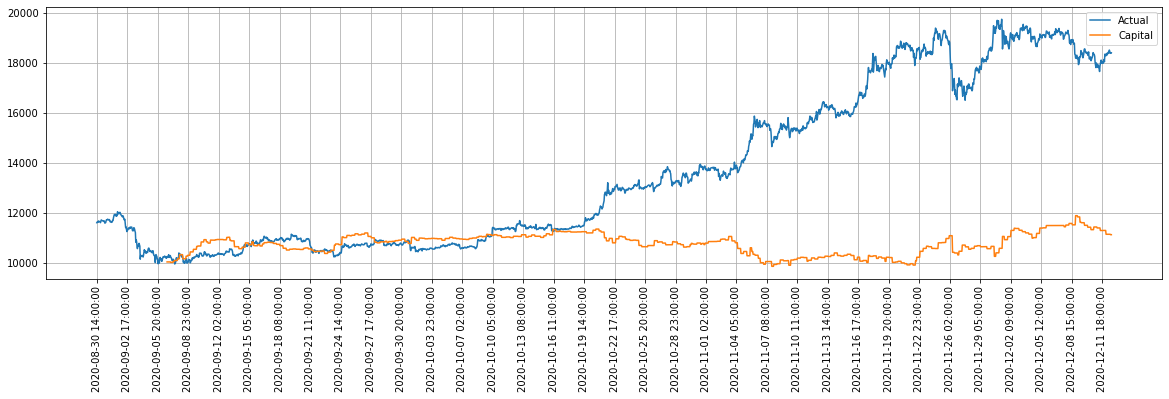

In [11]:
tick_loc = [i for i in range(len(df)) if i % 75 == 0]

plt.figure(figsize=(20,5))
plt.plot(df.index, df.close)
plt.plot(df.index, df.capital)

plt.legend(('Actual', 'Capital'))
plt.xticks(tick_loc, rotation=90)
plt.grid(True)
plt.show()